In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [39]:
df = pd.read_csv("../../data/curated/cleaned_real_estate_data.csv")
display(df)
df.describe()

,postcode,weekly_rent,days_listed,bedrooms,bathrooms,carspaces,property_type,lat,lon,agency,...,Population-2023,incidents_recorded,rate_per_100000_population,population_est,crime_per_person,crime_index,crime_rank,available_day,available_month,available_year
0,3032,660.0,50.0,2.0,1.0,1.0,House,-37.777050,144.91820,Keyhole Property Investments,...,13408,16262.250000,10220.714480,152460.693763,0.102207,1.813199,137.750000,10,9,2025
1,3039,500.0,3.0,2.0,1.0,1.0,Apartment / Unit / Flat,-37.766006,144.91553,Simone Bullen,...,17203,10143.000000,7696.915003,138420.725117,0.076969,1.365466,183.000000,19,9,2025
2,3181,451.0,4938.0,1.0,1.0,1.0,Apartment / Unit / Flat,-37.853140,144.99860,Prime Property Partners Australia,...,20268,19274.333333,12658.554200,141511.437067,0.126586,2.245682,25.333333,22,5,2014
3,3186,1575.0,4839.0,2.0,2.0,1.0,Apartment / Unit / Flat,-37.904400,144.99974,Westprecinct,...,18828,9564.000000,7462.652360,138790.023500,0.074627,1.323907,307.500000,18,6,2022
4,3550,650.0,4654.0,2.0,2.0,1.0,House,-36.767086,144.28296,Tweed Sutherland First National,...,15236,9525.000000,7471.272827,127488.317200,0.074713,1.325436,150.000000,21,7,2026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12013,3977,460.0,0.0,2.0,1.0,1.0,Apartment / Unit / Flat,-38.103203,145.28055,Finning First National,...,13530,21416.000000,5128.123281,417618.665300,0.051281,0.909751,439.000000,29,9,2025
12014,3051,720.0,0.0,2.0,2.0,1.0,Apartment / Unit / Flat,-37.790173,144.93962,COMPASS REAL ESTATE (VIC) PTY LTD,...,18017,34620.000000,17792.112910,194580.599700,0.177921,3.156398,2.000000,9,9,2025
12015,3171,650.0,0.0,3.0,2.0,2.0,Townhouse,-37.961456,145.16086,Buxton Real Estate Dingley Village,...,23509,14568.500000,7901.140204,190296.130450,0.079011,1.401696,189.500000,10,10,2025
12016,3051,640.0,0.0,2.0,2.0,1.0,Apartment / Unit / Flat,-37.790173,144.93962,COMPASS REAL ESTATE (VIC) PTY LTD,...,18017,34620.000000,17792.112910,194580.599700,0.177921,3.156398,2.000000,9,9,2025


,postcode,weekly_rent,days_listed,bedrooms,bathrooms,carspaces,lat,lon,num_metro_bus_stops,num_metro_tram_stops,...,Population-2023,incidents_recorded,rate_per_100000_population,population_est,crime_per_person,crime_index,crime_rank,available_day,available_month,available_year
count,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,...,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000
mean,3230.992761,621.903977,66.782410,2.720835,1.587203,1.626061,-37.774204,144.952027,61.837910,20.948910,...,15133.265602,13259.928384,7684.032919,180735.334572,0.076840,1.363181,269.823291,14.796888,8.355051,2024.888001
std,277.271048,249.176926,281.538665,1.081993,0.629443,0.946937,0.389259,0.549632,43.221829,35.017988,...,5344.145698,5828.544925,3151.200573,76600.862506,0.031512,0.559037,176.530887,9.181812,1.497439,1.383134
min,3000.000000,33.000000,0.000000,1.000000,1.000000,1.000000,-38.829080,141.000550,0.000000,0.000000,...,15.000000,77.000000,2170.585705,3547.429609,0.021706,0.385071,2.000000,1.000000,1.000000,1970.000000
25%,3041.000000,490.000000,7.000000,2.000000,1.000000,1.000000,-37.893566,144.856668,22.000000,0.000000,...,11899.000000,9525.000000,5307.808352,137311.328267,0.053078,0.941628,108.666667,6.000000,8.000000,2025.000000
50%,3131.000000,560.000000,19.000000,3.000000,2.000000,1.000000,-37.821620,144.977195,66.000000,0.000000,...,14728.000000,13140.500000,6412.763575,161297.362998,0.064128,1.137652,267.000000,15.000000,9.000000,2025.000000
75%,3219.000000,683.000000,39.000000,4.000000,2.000000,2.000000,-37.745968,145.104640,96.000000,35.000000,...,18401.000000,17495.333333,9411.189972,223054.782325,0.094112,1.669586,413.333333,23.000000,9.000000,2025.000000
max,3996.000000,3000.000000,4938.000000,11.000000,12.000000,22.000000,-34.166810,149.756800,183.000000,127.000000,...,30758.000000,34620.000000,17792.112910,417618.665300,0.177921,3.156398,815.000000,31.000000,12.000000,2026.000000


### Feature processing - Outlier detection

Too many features to do manually, just apply zscore > 3 and IQR*1.5 as our 2 rules

In [40]:
def filter_z_score(df, threshold=3):
    df_numeric = df.select_dtypes(include=np.number) # Select numeric columns
    z_scores = np.abs(stats.zscore(df_numeric)) # Compute Z-scores
    mask = (z_scores < threshold).all(axis=1) # Keep rows where all numeric columns are within threshold

    return df[mask].reset_index(drop=True)

In [41]:
def filter_iqr(df):
    df_numeric = df.select_dtypes(include=np.number)
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1

    mask = ~((df_numeric < (Q1 - 3 * IQR)) | 
            (df_numeric > (Q3 + 3 * IQR))).any(axis=1)

    return df[mask].reset_index(drop=True)

In [42]:
# df_clean_z = filter_z_score(df)
# df_clean_iqr = filter_iqr(df)
# df_clean_iqr.to_csv("../data/curated/cleaned_real_estate_data_iqr.csv")

### Visualisation functions

Boxplot of Weekly Rent by Property Type

In [43]:
def plot_rent_by_property_type(df):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='property_type', y='weekly_rent')
    plt.title('Weekly Rent by Property Type')
    plt.ylabel('Weekly Rent ($)')
    plt.xlabel('Property Type')
    plt.xticks(rotation=45)
    plt.show()

Scatter: Bedrooms/Bathrooms/Carspaces vs Weekly Rent

In [44]:
def plot_size_features_vs_rent(df):
    features = ['bedrooms','bathrooms','carspaces']
    plt.figure(figsize=(15,4))
    for i, feat in enumerate(features):
        plt.subplot(1,3,i+1)
        sns.scatterplot(data=df, x=feat, y='weekly_rent', alpha=0.5)
        plt.title(f'{feat.capitalize()} vs Weekly Rent')
        plt.ylabel('Weekly Rent ($)')
    plt.tight_layout()
    plt.show()

Correlation Heatmap (Internal Features)

In [45]:
def plot_internal_corr(df):
    internal_features = ['weekly_rent','days_listed','bedrooms','bathrooms','carspaces']
    corr = df[internal_features].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix (Internal Features)')
    plt.show()

Average Rent by Number of Bedrooms

In [46]:
def plot_avg_rent_by_bedrooms(df):
    avg_rent = df.groupby('bedrooms')['weekly_rent'].mean().reset_index()
    plt.figure(figsize=(8,6))
    sns.barplot(data=avg_rent, x='bedrooms', y='weekly_rent', errorbar='sd')
    plt.title('Average Weekly Rent by Number of Bedrooms')
    plt.ylabel('Average Rent ($)')
    plt.xlabel('Bedrooms')
    plt.show()

Rent vs Median Household Income

In [47]:
def plot_rent_vs_income(df):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='Median_tot_prsnl_inc_weekly', y='weekly_rent', alpha=0.5)
    sns.regplot(data=df, x='Median_tot_prsnl_inc_weekly', y='weekly_rent', scatter=False, color='red')
    plt.title('Weekly Rent vs Median Household Income')
    plt.ylabel('Weekly Rent ($)')
    plt.xlabel('Median Household Income ($/week)')
    plt.show()

Rent vs Crime Index

In [48]:
def plot_rent_vs_crime(df):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='crime_index', y='weekly_rent', alpha=0.5)
    sns.regplot(data=df, x='crime_index', y='weekly_rent', scatter=False, color='red')
    plt.title('Weekly Rent vs Crime Index')
    plt.ylabel('Weekly Rent ($)')
    plt.xlabel('Crime Index')
    plt.show()

Rent vs Median Age

In [49]:
def plot_rent_vs_median_age(df):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='Median_age_persons', y='weekly_rent', alpha=0.5)
    sns.regplot(data=df, x='Median_age_persons', y='weekly_rent', scatter=False, color='red')
    plt.title('Weekly Rent vs Median Age of Residents')
    plt.ylabel('Weekly Rent ($)')
    plt.xlabel('Median Age')
    plt.show()

Map Visualization of Rent (latitude vs longitude)

In [50]:
def plot_rent_map(df):
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=df, x='lon', y='lat', hue='weekly_rent', size='Population-2023',
                    palette='viridis', sizes=(20,200), alpha=0.6)
    plt.title('Weekly Rent by Suburb (Lat/Lon)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

Stacked Bar: Rent by Property Type Across Suburbs

In [51]:
def plot_rent_by_property_suburb(df):
    avg_rent = df.groupby(['agency','property_type'])['weekly_rent'].mean().unstack()
    avg_rent.plot(kind='bar', stacked=True, figsize=(12,6))
    plt.title('Average Weekly Rent by Property Type Across Agencies')
    plt.ylabel('Weekly Rent ($)')
    plt.xlabel('Agency / Suburb')
    plt.xticks(rotation=45)
    plt.show()

Feature Importance Approximation (Correlation)

In [52]:
def plot_feature_correlation(df):
    numeric_cols = df.select_dtypes(include='number').columns.drop('weekly_rent')
    corr = df[numeric_cols].corrwith(df['weekly_rent']).sort_values(key=abs, ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x=corr.values, y=corr.index)
    plt.title('Feature Correlation with Weekly Rent')
    plt.xlabel('Correlation Coefficient')
    plt.show()

Plot all

In [53]:
DATA = df

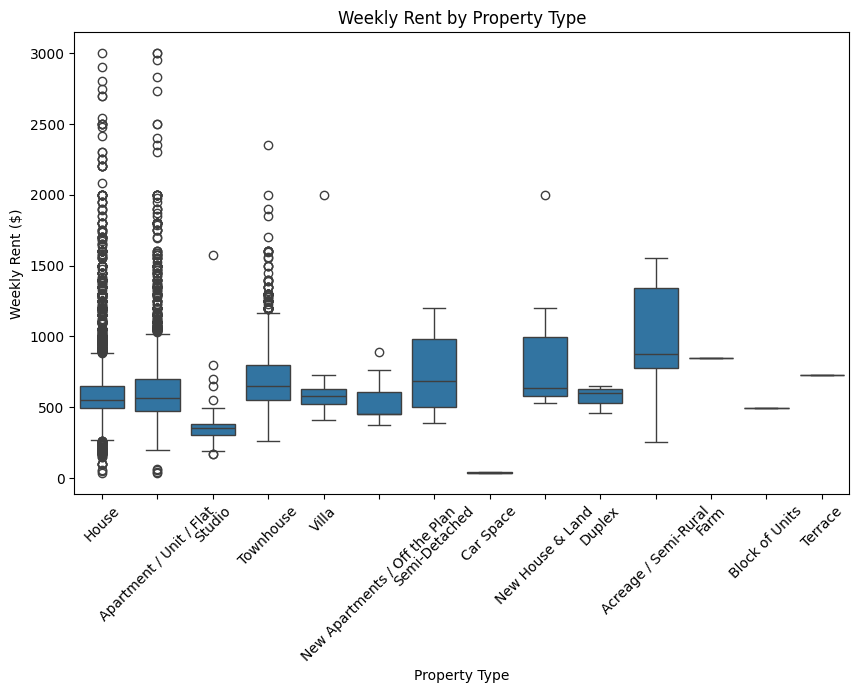

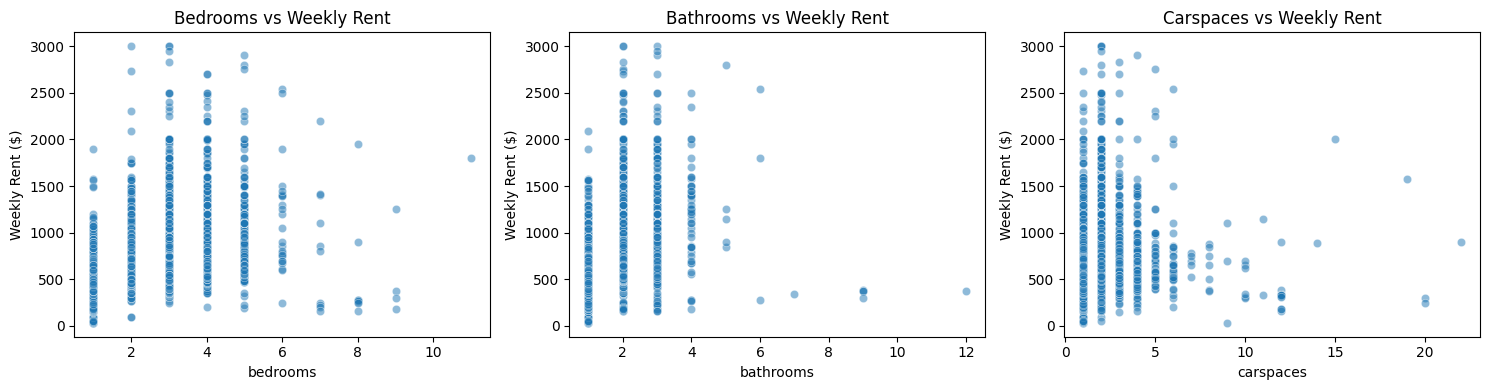

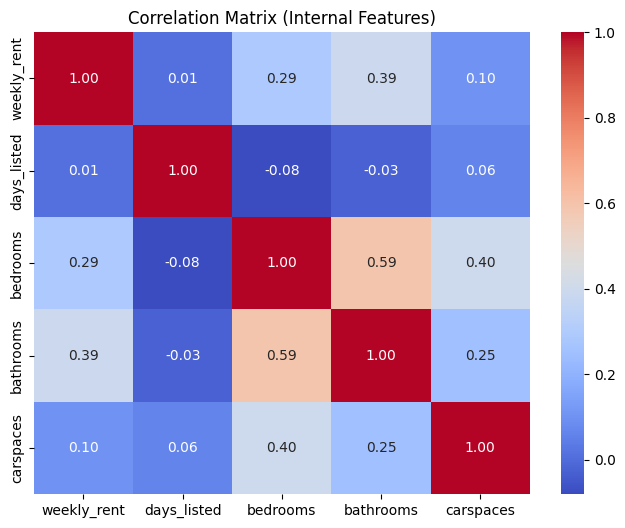

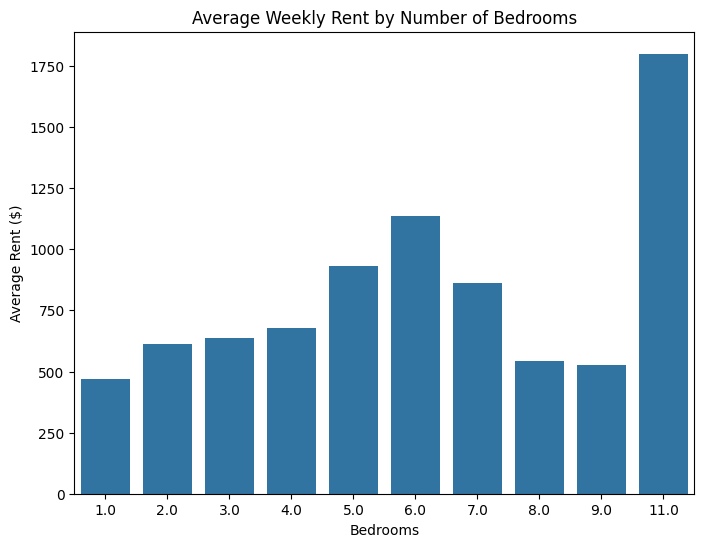

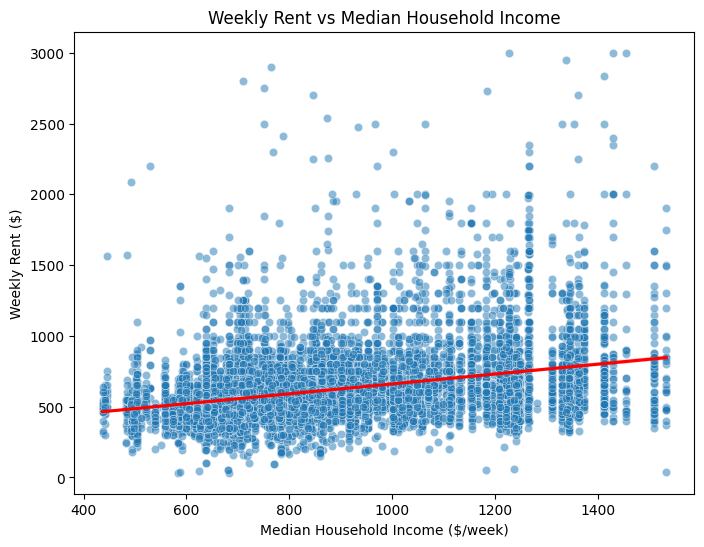

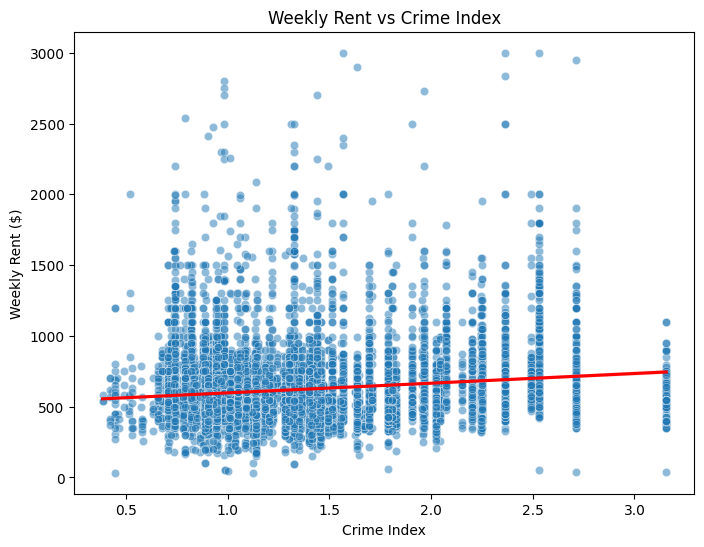

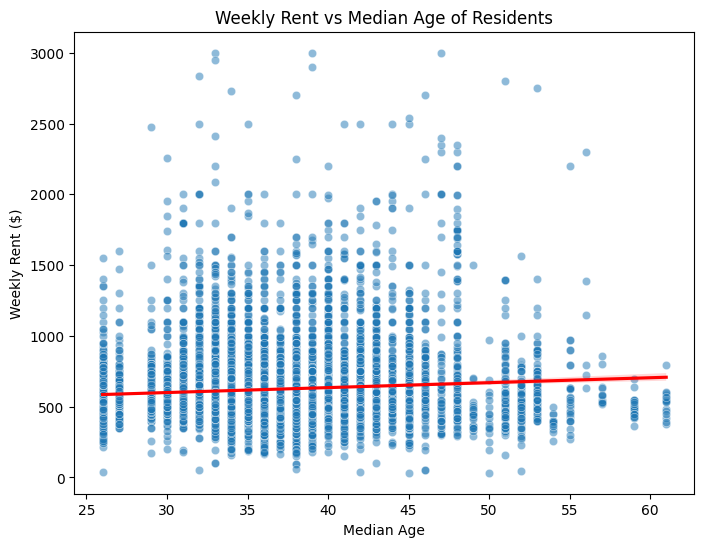

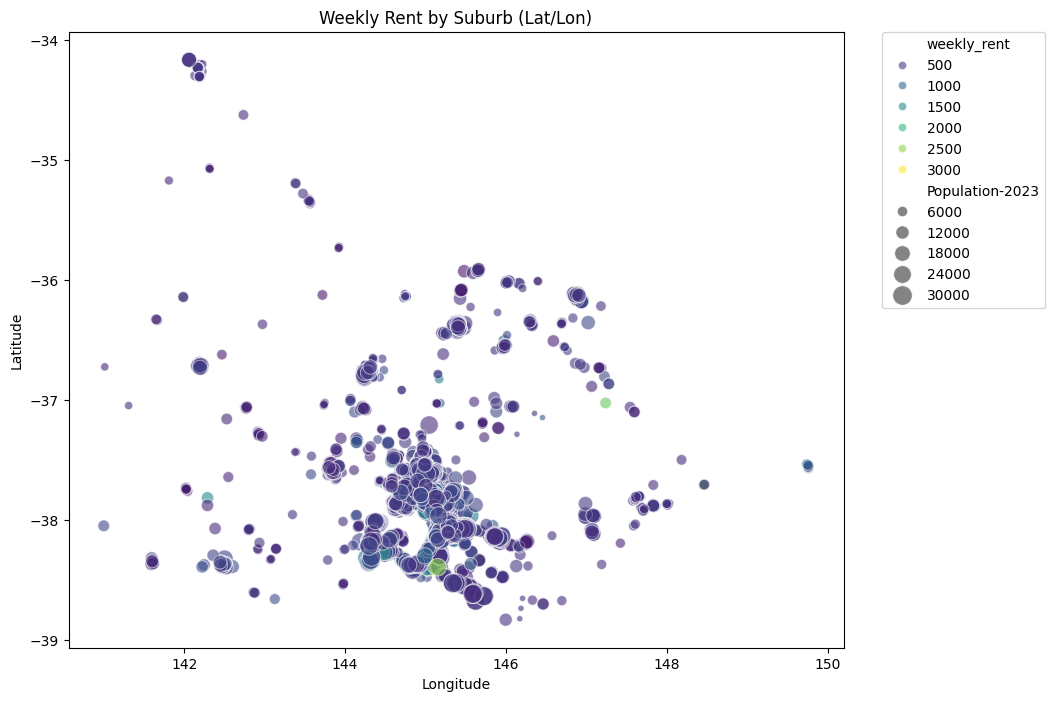

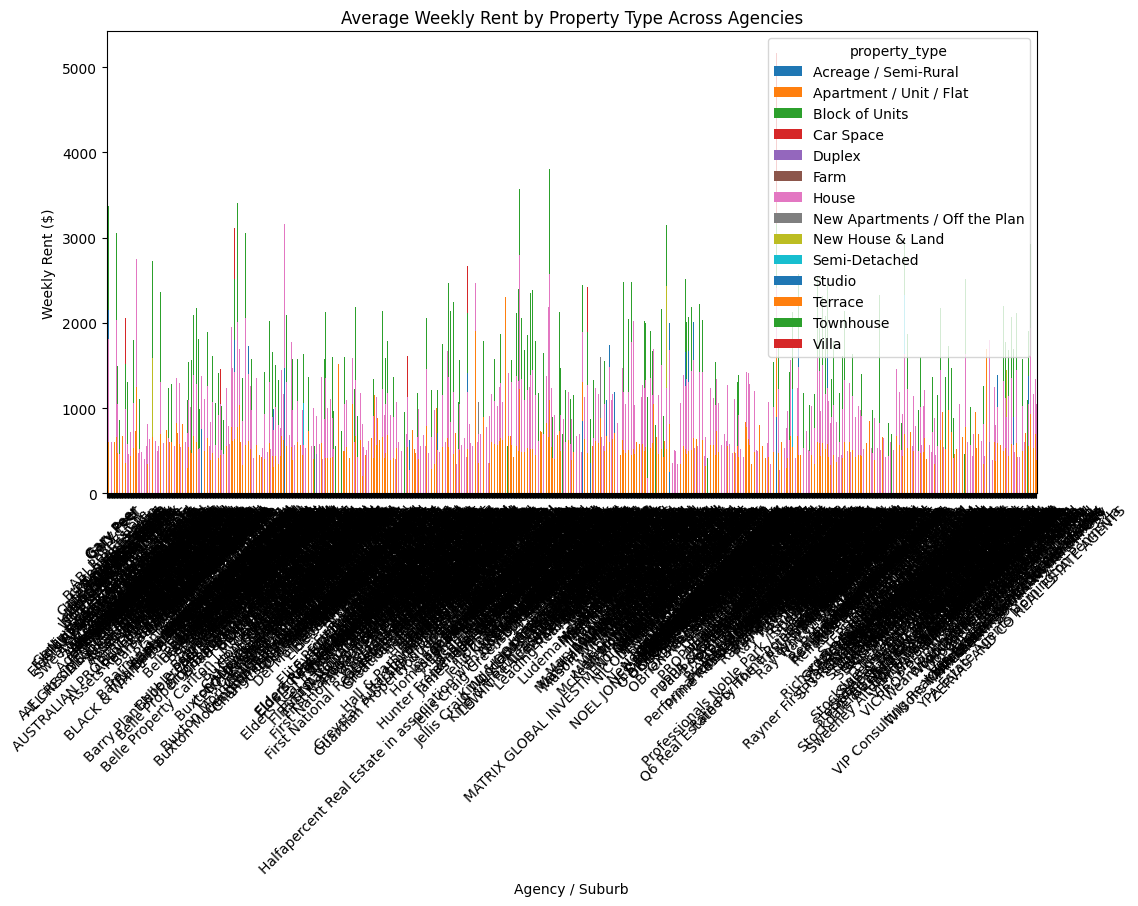

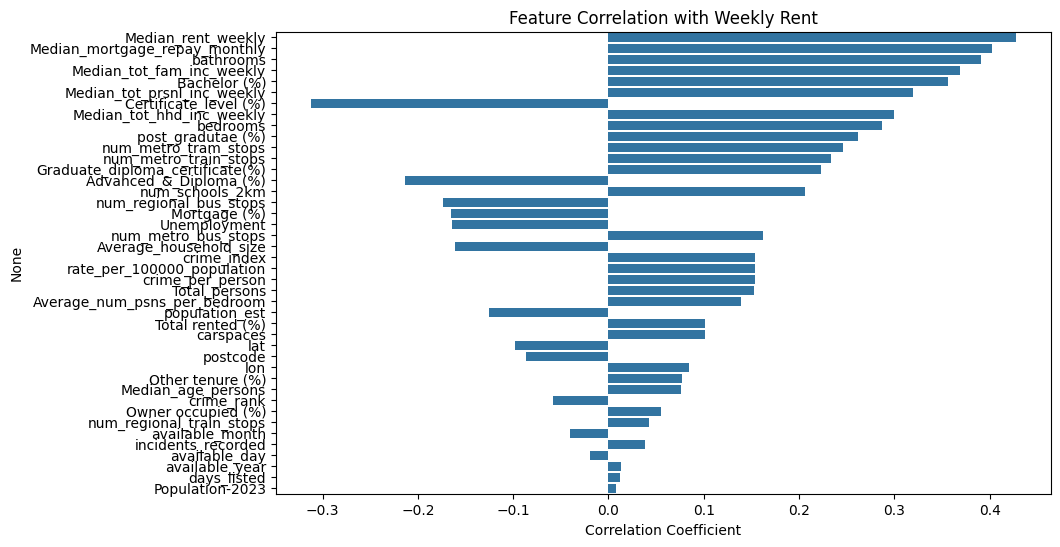

In [54]:
plot_rent_by_property_type(DATA)
plot_size_features_vs_rent(DATA)
plot_internal_corr(DATA)
plot_avg_rent_by_bedrooms(DATA)
plot_rent_vs_income(DATA)
plot_rent_vs_crime(DATA)
plot_rent_vs_median_age(DATA)
plot_rent_map(DATA)
plot_rent_by_property_suburb(DATA)
plot_feature_correlation(DATA)